In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
# Load the Metro rail and Metro Bus datasets
metrorail_df = pd.read_csv("data/Metrorail daily ridership.csv",names=["Date","Total Entries", "Total Exits"],header=0)
metrobus_df = pd.read_csv("data/Metrobus daily ridership.csv",names=["Date","Total Entries"])
# Load the metrorail ridership for the individual stations, collect into one dataframe
li = []
paths = ["data/" + path for path in os.listdir("./data") if not path in ["Metrorail daily ridership.csv","Metrobus daily ridership.csv"]]
for path in paths:
    station_df = pd.read_csv(path,names=["Date","Total Entries", "Total Exits"],header=0)
    station = path[31:]
    station_df['Station'] = station.rsplit(" ",1)[0]
    station_df['Location'] = station.rsplit(" ",1)[1][:-4]
    li.append(station_df)
metrorail_station_df = pd.concat(li)
metrorail_station_df.head()

,Date,Total Entries,Total Exits,Station,Location
0,1/1/2019,866,884,brookland cua,outdoor
1,1/2/2019,"3,645","3,723",brookland cua,outdoor
2,1/3/2019,"4,085","4,092",brookland cua,outdoor
3,1/4/2019,"4,035","3,948",brookland cua,outdoor
4,1/5/2019,"1,608","1,483",brookland cua,outdoor


In [3]:
# Set Dates
metrorail_station_df["Date"] = pd.to_datetime(metrorail_station_df["Date"])
metrorail_df["Date"] = pd.to_datetime(metrorail_df["Date"])
metrobus_df["Date"] = pd.to_datetime(metrobus_df["Date"])
# Set Entries/Exits dtype
metrobus_df['Total Entries'] = pd.to_numeric(metrobus_df['Total Entries'].str.replace(",",""))
metrorail_df['Total Entries'] = pd.to_numeric(metrorail_df['Total Entries'].str.replace(",",""))
metrorail_station_df['Total Entries'] = pd.to_numeric(metrorail_station_df['Total Entries'].str.replace(",",""))

In [4]:
# Get Day of the Week
metrorail_station_df['DOTW'] = metrorail_station_df['Date'].dt.day_name()
metrorail_df['DOTW'] = metrorail_df['Date'].dt.day_name()
metrobus_df['DOTW'] = metrobus_df['Date'].dt.day_name()

In [5]:
# Comparing January-> June of 2019 - 2020
metrorail_2020 = metrorail_df.loc[(metrorail_df['Date'] >= '1/1/2020') & (metrorail_df['Date'] < '7/1/2020')]
metrorail_2019 = metrorail_df.loc[(metrorail_df['Date'] >= '1/1/2019') & (metrorail_df['Date'] < '7/1/2019')]
metrobus_2020 = metrobus_df.loc[(metrobus_df['Date'] >= '1/1/2020') & (metrobus_df['Date'] < '7/1/2020')]
metrobus_2019 = metrobus_df.loc[(metrobus_df['Date'] >= '1/1/2019') & (metrobus_df['Date'] < '7/1/2019')]

# Group by month
rail_2020_monthly = metrorail_2020.groupby(pd.PeriodIndex(metrorail_2020['Date'], freq="M"))['Total Entries'].mean().reset_index()
rail_2019_monthly = metrorail_2019.groupby(pd.PeriodIndex(metrorail_2019['Date'], freq="M"))['Total Entries'].mean().reset_index()
bus_2020_monthly = metrobus_2020.groupby(pd.PeriodIndex(metrobus_2020['Date'], freq="M"))['Total Entries'].mean().reset_index()
bus_2019_monthly = metrobus_2019.groupby(pd.PeriodIndex(metrobus_2019['Date'], freq="M"))['Total Entries'].mean().reset_index()

In [6]:
rail_2020_monthly['Month'] = ['January',"February","March","April","May",'June']
rail_2019_monthly['Month'] = ['January',"February","March","April","May",'June']
bus_2020_monthly['Month'] = ['January',"February","March","April","May",'June']
bus_2019_monthly['Month'] = ['January',"February","March","April","May",'June']

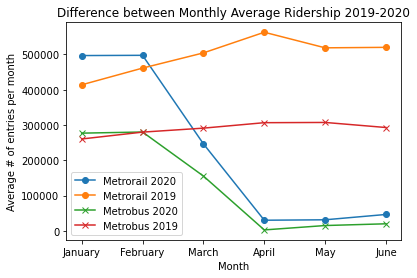

In [28]:
fig, ax = plt.subplots()
ax.plot(rail_2020_monthly['Month'],pd.to_numeric(rail_2020_monthly['Total Entries']),label="Metrorail 2020",marker='o')
ax.plot(rail_2019_monthly['Month'],pd.to_numeric(rail_2019_monthly['Total Entries']),label="Metrorail 2019",marker='o')
ax.plot(bus_2020_monthly['Month'],pd.to_numeric(bus_2020_monthly['Total Entries']),label="Metrobus 2020",marker='x')
ax.plot(bus_2019_monthly['Month'],pd.to_numeric(bus_2019_monthly['Total Entries']),label="Metrobus 2019",marker='x')
ax.set_title("Difference between Monthly Average Ridership 2019-2020")
ax.set_xlabel("Month")
ax.set_ylabel("Average # of entries per month")
ax.legend()


In [8]:
metrobus_drops = bus_2020_monthly.merge(bus_2019_monthly,on="Month")
metrobus_drops['Drop'] = (metrobus_drops['Total Entries_y'] - metrobus_drops["Total Entries_x"])/ metrobus_drops['Total Entries_y']
metrobus_drops

,Date_x,Total Entries_x,Month,Date_y,Total Entries_y,Drop
0,2020-01,276863.419355,January,2019-01,260306.032258,-0.063607
1,2020-02,280077.896552,February,2019-02,279777.107143,-0.001075
2,2020-03,155232.741935,March,2019-03,291050.967742,0.466648
3,2020-04,2557.033333,April,2019-04,306510.533333,0.991658
4,2020-05,14983.419355,May,2019-05,307176.870968,0.951222
5,2020-06,19917.133333,June,2019-06,292807.800000,0.931979


In [10]:
metrorail_drops = rail_2020_monthly.merge(rail_2019_monthly,on="Month")
metrorail_drops['Drop'] = (metrorail_drops['Total Entries_y'] - metrorail_drops["Total Entries_x"])/ metrorail_drops['Total Entries_y']
metrorail_drops

,Date_x,Total Entries_x,Month,Date_y,Total Entries_y,Drop
0,2020-01,496778.900000,January,2019-01,413842.266667,-0.200406
1,2020-02,497469.535714,February,2019-02,461234.185185,-0.078562
2,2020-03,246550.774194,March,2019-03,504340.451613,0.511142
3,2020-04,30030.033333,April,2019-04,562874.966667,0.946649
4,2020-05,31259.516129,May,2019-05,518693.709677,0.939734
5,2020-06,46378.633333,June,2019-06,520081.033333,0.910824


In [16]:
rail_means_2019 = metrorail_2019.groupby(['DOTW'])['Total Entries'].mean().reset_index().rename(columns={"Total Entries":"Mean"})
rail_means_2020 = metrorail_2020.groupby(['DOTW'])['Total Entries'].mean().reset_index().rename(columns={"Total Entries":"Mean"})
bus_means_2019 = metrobus_2019.groupby(['DOTW'])['Total Entries'].mean().reset_index().rename(columns={"Total Entries":"Mean"})
bus_means_2020 = metrobus_2020.groupby(['DOTW'])['Total Entries'].mean().reset_index().rename(columns={"Total Entries":"Mean"})

metrobus_2019 = metrobus_2019.merge(bus_means_2019, on="DOTW")
metrobus_2020 = metrobus_2020.merge(bus_means_2020, on="DOTW")
metrorail_2019 = metrorail_2019.merge(rail_means_2019, on="DOTW")
metrorail_2020 = metrorail_2020.merge(rail_means_2020, on="DOTW")

In [19]:
metrobus_2019['Norm Entries'] = metrobus_2019['Total Entries'] / (metrobus_2019["Mean"]/metrobus_2019['Total Entries'].mean())
metrobus_2020['Norm Entries'] = metrobus_2020['Total Entries'] / (metrobus_2020["Mean"]/metrobus_2020['Total Entries'].mean())
metrorail_2019['Norm Entries'] = metrorail_2019['Total Entries'] / (metrorail_2019["Mean"]/metrorail_2019['Total Entries'].mean())
metrorail_2020['Norm Entries'] = metrorail_2020['Total Entries'] / (metrorail_2020["Mean"]/metrorail_2020['Total Entries'].mean())

In [22]:
metrorail_2020.sort_values("Date").head(7)

,Date,Total Entries,Total Exits,DOTW,Mean,Norm Entries
0,2020-01-01,130337,"128,280",Wednesday,284104.461538,101277.055999
26,2020-01-02,499014,"493,742",Thursday,293865.384615,374874.327604
52,2020-01-03,488136,"483,225",Friday,266435.769231,404454.536546
78,2020-01-04,188777,"186,073",Saturday,104101.115385,400327.200154
104,2020-01-05,145454,"143,348",Sunday,75751.692308,423891.522592
130,2020-01-06,615835,"607,854",Monday,240812.875000,564554.751408
154,2020-01-07,649476,"642,286",Tuesday,281794.807692,508805.178125


In [25]:
mask_mandate_bus_df = metrobus_2020[(metrobus_2020['Date'] >= "2020-05-01") & (metrobus_2020['Date'] < "2020-06-01")].sort_values("Date")
mask_mandate_rail_df = metrorail_2020[(metrorail_2020['Date'] >= "2020-05-01") & (metrorail_2020['Date'] < "2020-06-01")].sort_values("Date")

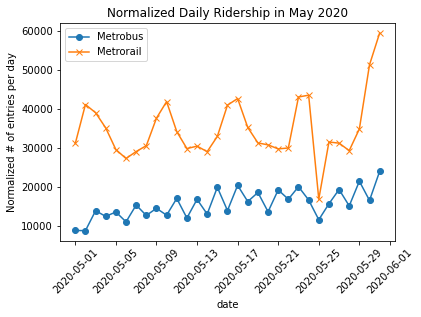

In [30]:
fig, ax = plt.subplots()
ax.plot(mask_mandate_bus_df['Date'],pd.to_numeric(mask_mandate_bus_df['Norm Entries']),label="Metrobus",marker='o')
ax.plot(mask_mandate_rail_df['Date'],pd.to_numeric(mask_mandate_rail_df['Norm Entries']),label="Metrorail",marker='x')
ax.set_title("Normalized Daily Ridership in May 2020")
ax.set_xlabel("date")
ax.set_ylabel("Normalized # of entries per day")
ax.tick_params(axis='x', rotation=45)
ax.legend()